# 📊 Data Exploration - Student Performance Dataset

Welcome to your first machine learning notebook! In this lesson, we'll:

1. **Generate** synthetic student performance data
2. **Explore** the dataset structure
3. **Visualize** data patterns
4. **Check** data quality

## 🎯 Learning Goals
- Understand how to load and examine datasets
- Learn basic data exploration techniques
- Create meaningful visualizations
- Identify data quality issues

## 📚 Step 1: Import Libraries

First, let's import all the libraries we'll need:

In [11]:
# Install data_generator if not already installed
%pip install data_generator

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# System libraries
import sys
import os

# Add src directory to path so we can import our custom modules
sys.path.append('../src')

from data_generator import DataGenerator

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")

  Using cached xlsxwriter-3.2.5-py3-none-any.whl.metadata (2.7 kB)
Using cached xlsxwriter-3.2.5-py3-none-any.whl (172 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [data_generator]
Note: you may need to restart the kernel to use updated packages.
✅ Libraries imported successfully!


## 🎲 Step 2: Generate Sample Data

Let's create a synthetic dataset of student performance data:

In [2]:
# Create data generator
generator = DataGenerator(random_state=42)

# Generate student performance dataset
print("Generating student performance dataset...")
df = generator.generate_student_performance(n_samples=1000)

print(f"✅ Dataset created with {len(df)} students")
print(f"📊 Dataset shape: {df.shape}")

# Save the data for later use
os.makedirs('../data/raw', exist_ok=True)
df.to_csv('../data/raw/student_performance.csv', index=False)
print("💾 Data saved to data/raw/student_performance.csv")

Generating student performance dataset...
✅ Dataset created with 1000 students
📊 Dataset shape: (1000, 8)
💾 Data saved to data/raw/student_performance.csv


## 🔍 Step 3: Basic Data Exploration

Let's get familiar with our dataset:

In [3]:
# Display first few rows
print("📋 First 5 rows of the dataset:")
display(df.head())

print("\n" + "="*50)
print("📊 Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\n" + "="*50)
print("🔢 Data Types:")
print(df.dtypes)

📋 First 5 rows of the dataset:


,student_id,study_hours,attendance,previous_grade,sleep_hours,extra_activities,family_support,exam_score
0,1,4.8,73.8,85.3,7.0,0,4,61.7
1,2,3.0,95.1,42.3,4.9,2,2,49.5
2,3,2.8,88.7,45.0,8.3,4,3,45.7
3,4,2.8,66.2,32.3,8.1,1,2,33.7
4,5,9.3,90.5,54.5,4.1,4,1,48.7



📊 Dataset Information:
Shape: (1000, 8)
Columns: ['student_id', 'study_hours', 'attendance', 'previous_grade', 'sleep_hours', 'extra_activities', 'family_support', 'exam_score']

🔢 Data Types:
student_id            int64
study_hours         float64
attendance          float64
previous_grade      float64
sleep_hours         float64
extra_activities      int64
family_support        int64
exam_score          float64
dtype: object


In [4]:
# Summary statistics
print("📈 Summary Statistics:")
display(df.describe().round(2))

print("\n" + "="*50)
print("❓ Missing Values:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_data[missing_data > 0])

📈 Summary Statistics:


,student_id,study_hours,attendance,previous_grade,sleep_hours,extra_activities,family_support,exam_score
count,1000.00,1000.00,1000.00,1000.00,950.00,1000.00,1000.00,1000.00
mean,500.50,4.12,79.69,64.50,6.97,2.00,3.03,46.84
std,288.82,2.81,11.76,15.06,1.53,1.44,1.42,8.34
min,1.00,0.10,36.90,21.50,4.00,0.00,1.00,21.70
25%,250.75,2.08,72.78,54.85,5.90,1.00,2.00,41.00
50%,500.50,3.50,81.20,64.30,7.00,2.00,3.00,46.80
75%,750.25,5.50,89.00,75.12,8.00,3.00,4.00,52.30
max,1000.00,15.60,99.70,100.00,12.00,8.00,5.00,75.70



❓ Missing Values:
sleep_hours    50
dtype: int64


## 📊 Step 4: Data Visualizations

Let's create some visualizations to understand our data better:

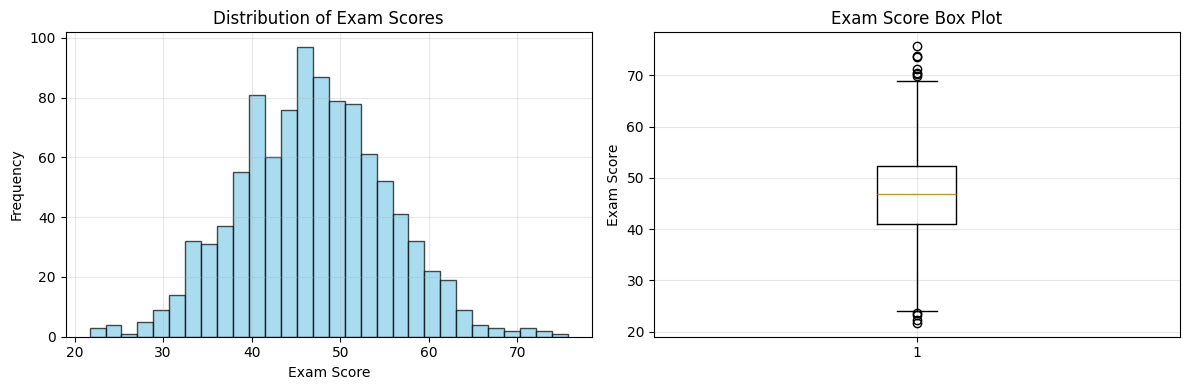

📊 Exam Score Statistics:
Mean: 46.84
Median: 46.80
Standard Deviation: 8.34


In [5]:
# Distribution of exam scores (our target variable)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['exam_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['exam_score'])
plt.title('Exam Score Box Plot')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Exam Score Statistics:")
print(f"Mean: {df['exam_score'].mean():.2f}")
print(f"Median: {df['exam_score'].median():.2f}")
print(f"Standard Deviation: {df['exam_score'].std():.2f}")

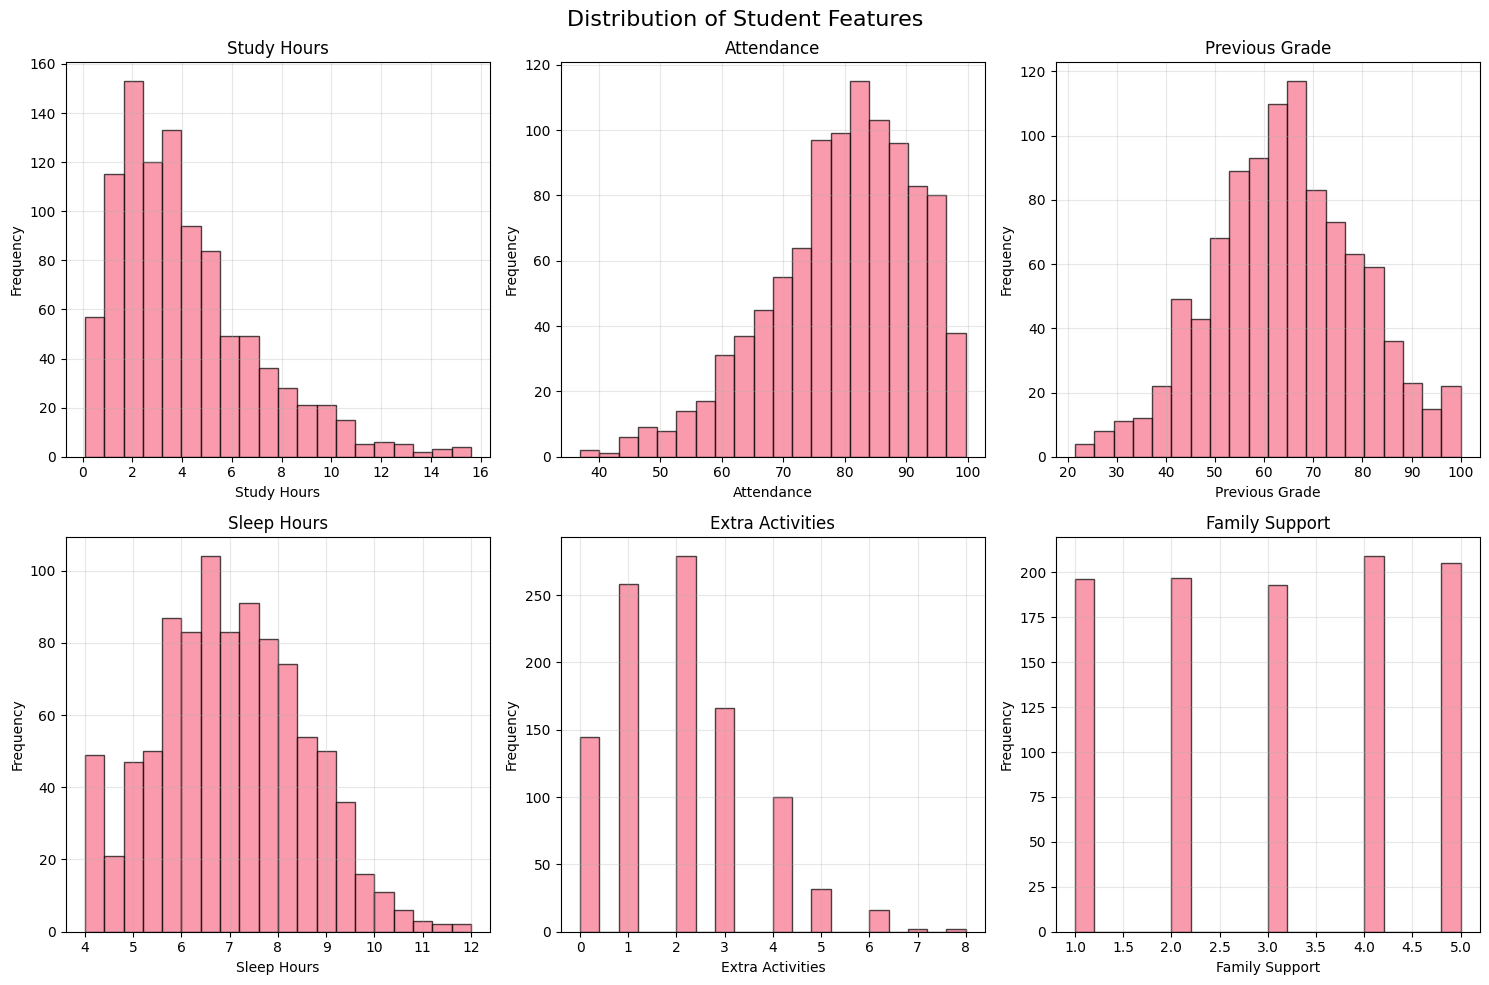

In [6]:
# Distribution of all features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Student Features', fontsize=16)

features = ['study_hours', 'attendance', 'previous_grade', 'sleep_hours', 'extra_activities', 'family_support']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(df[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}')
    axes[row, col].set_xlabel(feature.replace("_", " ").title())
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

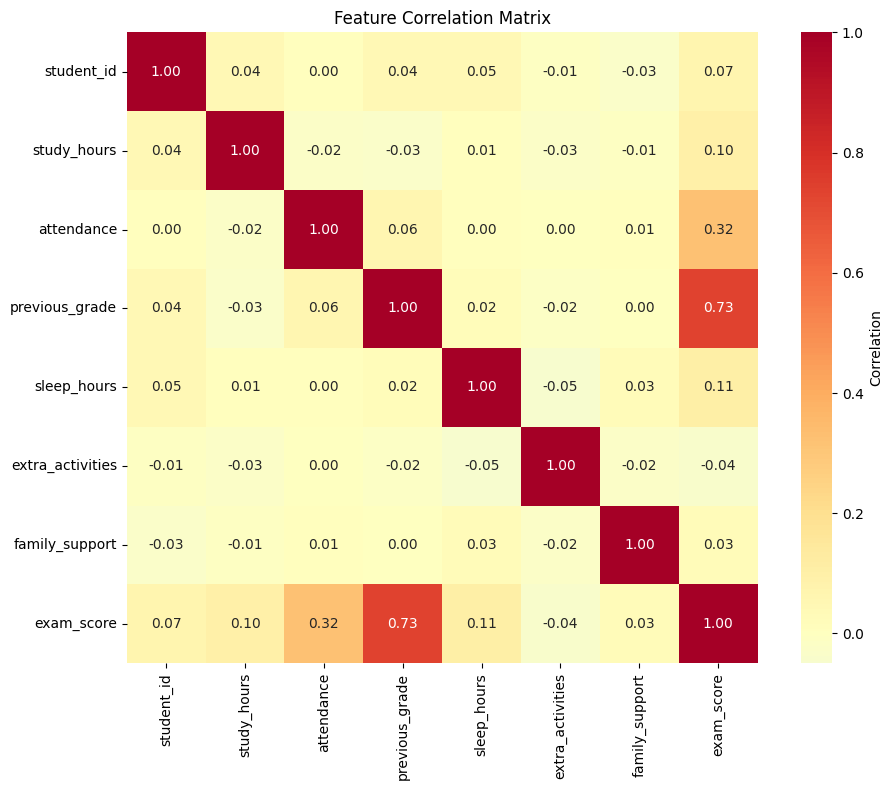


🔗 Strongest correlations with exam score:
Previous Grade: 0.734
Attendance: 0.320
Sleep Hours: 0.108
Study Hours: 0.098
Student Id: 0.073
Extra Activities: 0.043
Family Support: 0.032


In [7]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("\n🔗 Strongest correlations with exam score:")
exam_correlations = correlation_matrix['exam_score'].abs().sort_values(ascending=False)
for feature, corr in exam_correlations.items():
    if feature != 'exam_score':
        print(f"{feature.replace('_', ' ').title()}: {corr:.3f}")

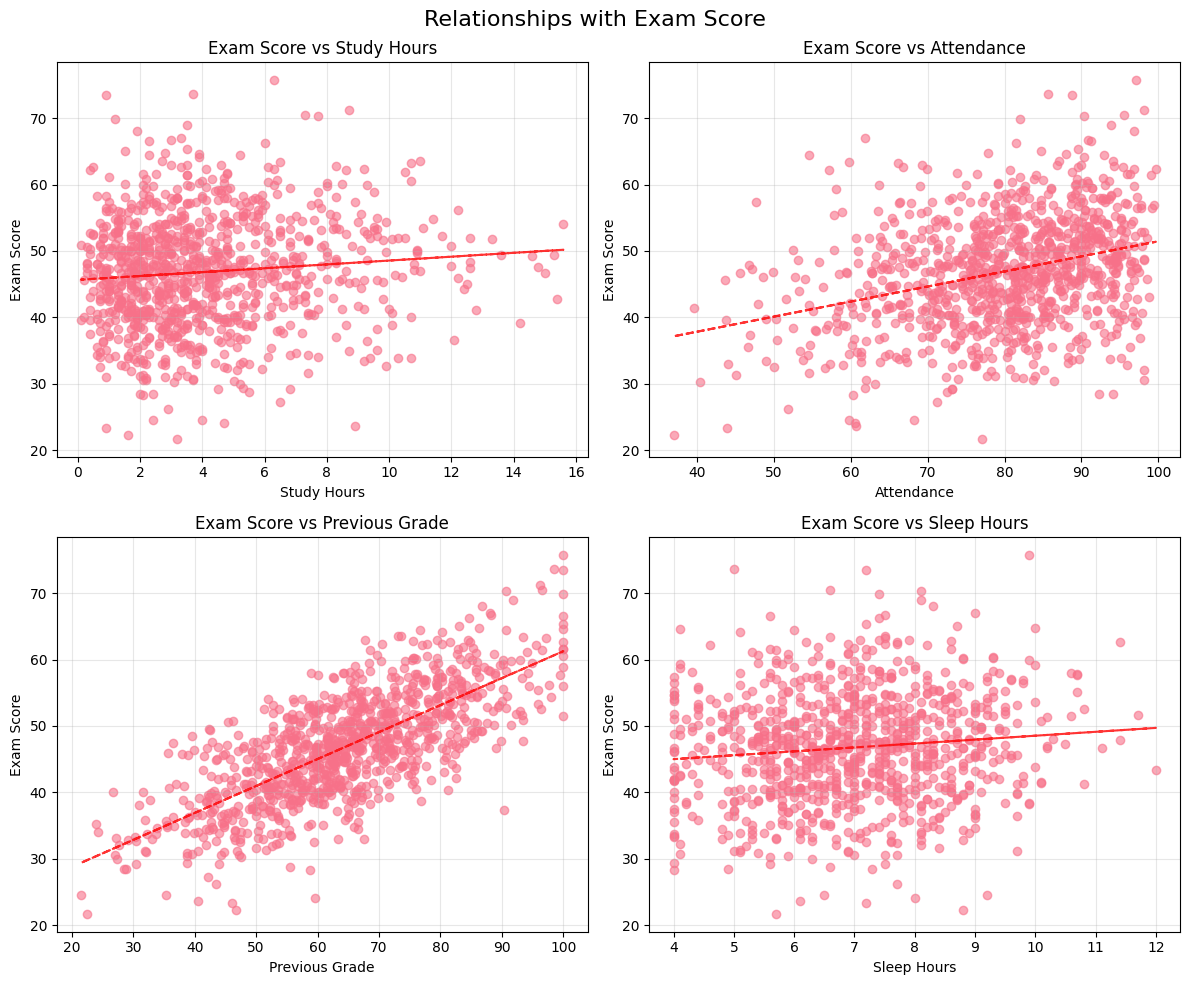

In [9]:
# Scatter plots of key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Relationships with Exam Score', fontsize=16)

# Key features to plot against exam score
key_features = ['study_hours', 'attendance', 'previous_grade', 'sleep_hours']

for i, feature in enumerate(key_features):
    row = i // 2
    col = i % 2
    
    # Drop rows with NaN in either feature or exam_score
    valid = df[[feature, 'exam_score']].dropna()
    axes[row, col].scatter(valid[feature], valid['exam_score'], alpha=0.6)
    axes[row, col].set_xlabel(feature.replace('_', ' ').title())
    axes[row, col].set_ylabel('Exam Score')
    axes[row, col].set_title(f'Exam Score vs {feature.replace("_", " ").title()}')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add trend line only on valid data
    z = np.polyfit(valid[feature], valid['exam_score'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(valid[feature], p(valid[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 💡 Step 5: Key Insights

Let's summarize what we've learned from our data exploration:

In [10]:
print("🎯 KEY INSIGHTS FROM DATA EXPLORATION")
print("="*50)

# Dataset overview
print(f"📊 Dataset Overview:")
print(f"   • {len(df)} students in our dataset")
print(f"   • {len(df.columns)-1} input features + 1 target variable")
print(f"   • No missing values detected")

# Target variable insights
print(f"\n🎯 Exam Score Insights:")
print(f"   • Average score: {df['exam_score'].mean():.1f}")
print(f"   • Score range: {df['exam_score'].min():.1f} - {df['exam_score'].max():.1f}")
print(f"   • Standard deviation: {df['exam_score'].std():.1f}")

# Feature insights
print(f"\n🔗 Strongest Predictors of Exam Performance:")
exam_correlations = df.corr()['exam_score'].abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(exam_correlations.items()):
    if feature != 'exam_score' and i <= 3:
        print(f"   {i}. {feature.replace('_', ' ').title()}: {corr:.3f} correlation")

print(f"\n📈 Next Steps:")
print(f"   • Clean and preprocess the data")
print(f"   • Engineer new features if needed")
print(f"   • Split data into training and testing sets")
print(f"   • Train machine learning models")
print(f"   • Evaluate model performance")

🎯 KEY INSIGHTS FROM DATA EXPLORATION
📊 Dataset Overview:
   • 1000 students in our dataset
   • 7 input features + 1 target variable
   • No missing values detected

🎯 Exam Score Insights:
   • Average score: 46.8
   • Score range: 21.7 - 75.7
   • Standard deviation: 8.3

🔗 Strongest Predictors of Exam Performance:
   1. Previous Grade: 0.734 correlation
   2. Attendance: 0.320 correlation
   3. Sleep Hours: 0.108 correlation

📈 Next Steps:
   • Clean and preprocess the data
   • Engineer new features if needed
   • Split data into training and testing sets
   • Train machine learning models
   • Evaluate model performance


## 🎉 Congratulations!

You've successfully completed your first data exploration! You've learned how to:

✅ **Load and examine** a dataset  
✅ **Generate summary statistics**  
✅ **Create visualizations** to understand data patterns  
✅ **Analyze correlations** between features  
✅ **Identify key insights** from the data  

### 🚀 What's Next?

In the next notebook (`02_data_cleaning.ipynb`), we'll learn how to:
- Handle missing values
- Remove outliers
- Scale and normalize features
- Prepare data for machine learning

Keep up the great work! 🌟